# Case Study

### Project Brief

You are on the data science team for a coffee company that is looking to expand their business into Ukraine. They want to get an understanding of the existing coffee shop market there.

You have a dataset from Google businesses. It contains information about coffee shops in Ukraine. The marketing manager wants to identify the key coffee shop segments. They will use this to construct their marketing plan. In their current location, they split the market into 5 segments. The marketing manager wants to know how many segments are in this new market, and their key features.

You will be presenting your findings to the Marketing Manager, who has no data science background.

The data you will use for this analysis can be accessed here: `"data/coffee_shops.csv"`

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
# The first thing we are going to do is to import all the libraries we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Data Reading

Now we will read the data that comes as a csv(Comma separated values) file and save it in a Dataframe

In [2]:
df = pd.read_csv('data/coffee_shops.csv')

Now we show some of our data that we store in our Dataframe as a Table

In [3]:
df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True


Next we will call the info function so have a basic description of our variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            122 non-null    object 
 6   Delivery option  129 non-null    object 
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.2+ KB


We can see that:
 - There are 9 variables
 - Only 2 of them are number type variables
 - Not all of them have the data complete(null values)
 

## Missing Data

As we saw with the info function there is a lot of missing data in our dataset so we are going to explore this more deeply

In [5]:
df.isnull().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price              78
Delivery option    71
Dine in option     60
Takeout option     56
dtype: int64

We see that there are only 2 missing values in both Rating and Reviews an as they are number type variables it is usualy a good idea to replace these with the mean of the column

In [6]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].mean())

We will continue now with the price variable

In [7]:
df.Price.value_counts()

$$     116
$$$      4
$        2
Name: Price, dtype: int64

Price variable
 - We see that there are 78 missing values which is almost half of them
 - Of the non-null values we see that 116 are in the middle range
 
 
 After seeing this we can assume that the price variable does not give us enought information so we can eliminate it from our data


In [8]:
df = df.drop(['Price'],axis=1)

Now we are going to examinate the other variables that have null values

In [9]:
df['Delivery option'].value_counts()

False    94
True     35
Name: Delivery option, dtype: int64

In [10]:
df['Dine in option'].value_counts()

True    140
Name: Dine in option, dtype: int64

In [11]:
df['Takeout option'].value_counts()

True    144
Name: Takeout option, dtype: int64

We see that both 'Takeout option' and 'Dine in option' have only True values so we can safely asume that the NaN values refer to the False

The last variable with null values will be Delivery option as it already have True and False values we cannot safely asume that all the null values are True or False so we are going to create a new type called unknown

In [12]:
df['Dine in option']= df['Dine in option'].fillna(False)
df['Takeout option']= df['Takeout option'].fillna(False)
df['Delivery option']= df['Delivery option'].fillna('unknown')

In [13]:
df.isnull().sum()

Region             0
Place name         0
Place type         0
Rating             0
Reviews            0
Delivery option    0
Dine in option     0
Takeout option     0
dtype: int64

Now that we don't have null values we can continue

## Object variables

Now we are going to check the rest of the object variables to see that all data is correct

As we are checking for text we are going to change some variables into lower cases to avoid future problems

In [14]:
df['Place name'] = df['Place name'].str.lower()
df['Place type'] = df['Place type'].str.lower()

In [15]:
df['Place type'].value_counts()

coffee shop                 97
cafe                        58
espresso bar                20
coffee store                11
store                        3
pastry shop                  2
coffee roasters              2
restaurant                   1
european restaurant          1
coffee stand                 1
chocolate shop               1
appliance repair service     1
internet shop                1
e-commerce service           1
Name: Place type, dtype: int64

In [16]:
df['Place name'].value_counts()

coffee house               7
dim kavy                   4
svit kavy                  3
lviv coffee manufacture    2
my coffee                  2
                          ..
chekhovych                 1
racers coffee shop         1
eclair&coffee              1
your coffee                1
don marco                  1
Name: Place name, Length: 183, dtype: int64

Now that we transformed all values into lower case we can be sure that there are not values that depend on any upper case letter 

In [17]:
df.Region.value_counts()

Kharkiv        20
Khrivoy Rog    20
Odessa         20
Zaporozhye     20
Kiev           20
Mariupol       20
Dnipro         20
Lviv           20
Poltava        20
Kherson        20
Name: Region, dtype: int64

We can clearly see that there are 20 coffe shops per Region

## Duplicated

In [18]:
df[df.duplicated()].shape

(0, 8)

We see that there are no duplicated rows so we will continue our analysis

# Summary

Before we continue we are going to show again our data to see everything is alright

In [19]:
df.head()

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
0,Mariupol,dim kavu,coffee store,4.6,206.0,unknown,False,False
1,Mariupol,коферум,cafe,5.0,24.0,False,False,True
2,Mariupol,кофейня світ чаю,coffee shop,5.0,11.0,unknown,False,True
3,Mariupol,кофейня starcoff,coffee shop,4.4,331.0,False,True,True
4,Mariupol,"кофейня ""friend zone""",coffee shop,5.0,12.0,unknown,True,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Delivery option  200 non-null    object 
 6   Dine in option   200 non-null    bool   
 7   Takeout option   200 non-null    bool   
dtypes: bool(2), float64(2), object(4)
memory usage: 9.9+ KB


We see that there are now 2 boolean variables, this is because this variables can only take 2 values ( True or False ) 

In [21]:
df.describe()

,Rating,Reviews
count,200.000000,200.000000
mean,4.663636,622.494949
std,0.220531,1393.841198
min,3.900000,3.000000
25%,4.600000,48.500000
50%,4.700000,277.000000
75%,4.800000,780.750000
max,5.000000,17937.000000


From the numeric variables we can see that 
 - The ratings go from 3.9 up to 5 with a low standard deviation of 0.22
 - The reviews variable that gives us the numer of reviews made go from 3 to 17937, this can suggest that the maximum number can be a outlier

In [22]:
df.describe(include='object')

,Region,Place name,Place type,Delivery option
count,200,200,200,200
unique,10,183,14,3
top,Kharkiv,coffee house,coffee shop,False
freq,20,7,97,94


From the object variables we see that
 - There are 10 unique regions and we saw earlier they appear 20 times each
 - There are a lot of different place names but they all does not have a different name so it means that there are some shops that have the same name but can be in an other region or be a different type of shop
 - We also see that there are 14 types of place types and almost half of them are a coffee shop
 - Finally as we saw earlier the delivery option variable has 3 different values and now we know that the most frequent thing is that they doesn't have a delivery option

# Graphics

We will continue our analysis with some graphics

## Boxplots

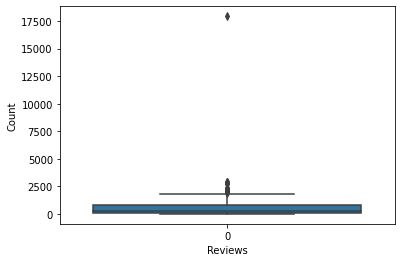

In [23]:
sns.boxplot(data = df['Reviews'])
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.show()

As seen in the describe function table there was a very high number of reviews for a shop and now we can confirm it was a extreme outlier, we will take care of this outlier later as outliers afffect greatly the kmeans model that we are going to use

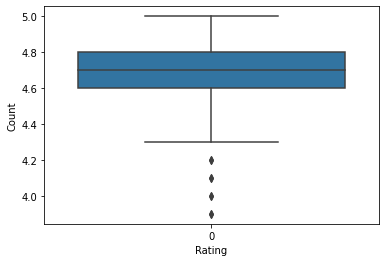

In [24]:
sns.boxplot(data = df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

From the other numeric variable 'Rating' we see that there are only 4 outliers but they are very close to mean

In [25]:
X_cuants = df[['Rating','Reviews']].copy()

We are now going to show the distributions of both of our numeric variables

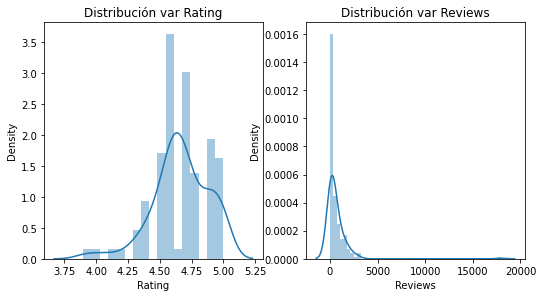

In [26]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(X_cuants.columns):
    n+=1
    plt.subplot(4, 4, n)
    sns.distplot(X_cuants[column])
    plt.title('Distribución var {}'.format(column))
plt.show()

We see that our distributions are skewed, this might be affected by the outliers so wee will check that

In [27]:
categorical_var = ['Place type','Delivery option','Dine in option','Takeout option']

And now our categorical variables

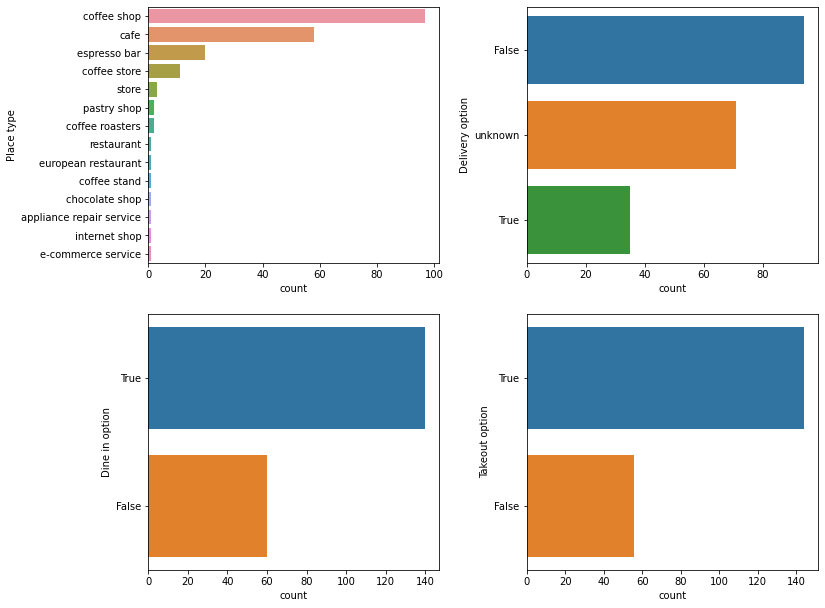

In [28]:
plt.figure(figsize=(12,16))
plt.subplots_adjust(hspace=0.2, wspace=0.3)
for i, categorical in enumerate(categorical_var):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=categorical, data=df, 
                  order=df[categorical].value_counts().index)
    
plt.show()

In summary:
 - We can now graphically see that as seen in the table before the most common place type is coffee shop followed by cafe and with a much lower frequency espresso bar
 - In our Delivery variable we see that almost half the shops doesn't offer this service, we have a lot of unknown values and there are not many shops that offer the service
 - We also see that 70% of the shops offer Dine in option
 - Also around 70% offer Takeout option

As normally the demographics of a country is very important to consider in order to take actions we will look into this

In [29]:
df.groupby('Region')[['Rating','Reviews']].mean().round(2).sort_values(by='Rating',ascending=False)


,Rating,Reviews
Region,,
Kiev,4.78,764.60
Odessa,4.78,422.00
Mariupol,4.70,193.80
Lviv,4.67,1938.65
Zaporozhye,4.67,389.95
Poltava,4.65,535.25
Kherson,4.64,382.77
Khrivoy Rog,4.60,461.90
Kharkiv,4.58,544.45


We see that Kiev that is Ukraine's capital has the highest ratings and a good number of reviews which makes a lot of sense since the capital is the most important city of a country an usually have the largest population

We can also see that having a high rating does not alway means having a lot of reviews

For example:
 - Mariupol have a high ranking but also has the lowest number of reviews
  - Lviv is the fourth highest ranked region but is the only on top in terms of reviews number

# Hypotesis Tranformations

We are going to use the kmeans algorithm so we need to follow some tranformations
 - All data must follow a normal distribution
 - It is very propense to outliers

The first thing we are going to do is to check the outliers

In [30]:
review_top = df['Reviews'].mean()+df['Reviews'].std()*3
df[df['Reviews'] > review_top]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
100,Lviv,lviv coffee manufacture,coffee shop,4.7,17937.0,True,True,True


We will also check if there are some in the lower part of our graphic

In [31]:
review_low = df['Reviews'].mean()-df['Reviews'].std()*3
df[df['Reviews'] < review_low]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option


Now we will delete them in order to fullfill the hypothesis

In [32]:
df = df.drop(100,axis=0)

Now we will check in the Rating variable

In [33]:
rating_top = df['Rating'].mean()+df['Rating'].std()*3
df[df['Rating'] > rating_top]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option


In [34]:
rating_low = df['Rating'].mean()-df['Rating'].std()*3
df[df['Rating'] < rating_low]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
133,Khrivoy Rog,dva gusya pizza,cafe,4.0,1439.0,True,True,True
160,Kharkiv,кофеточка харьков - интернет-магазин кофе и ко...,coffee store,3.9,10.0,unknown,False,False
188,Dnipro,coffee life,cafe,4.0,170.0,unknown,True,True
190,Dnipro,"""франс.уа"" кофейня-пекарня",cafe,3.9,9.0,False,False,True


As we did before we drop these rows

In [35]:
df = df.drop(133,axis=0)
df = df.drop(160,axis=0)
df = df.drop(188,axis=0)
df = df.drop(190,axis=0)

In [36]:
X_cuants = df[['Rating','Reviews']].copy()

Now we will follow to the second part of our hypothesis, it should follow a normal distribution so we will standardize it

In [37]:
scaler=StandardScaler()
scaler.fit(X_cuants)
data_normalized = scaler.transform(X_cuants)
data_normalized = pd.DataFrame(data=data_normalized, columns=X_cuants.columns)
data_normalized.agg(['mean', 'std']).round()

,Rating,Reviews
mean,-0.0,-0.0
std,1.0,1.0


## Elbow method

In order to chose the best number of clusters we will use the elbow method which will help us determine this by ploting the inertia of the models

In [38]:
cluster_range = range(1,10)
cluster_wss=[] 
for cluster in cluster_range:
    model = KMeans(cluster)
    model.fit(data_normalized)
    cluster_wss.append(model.inertia_)

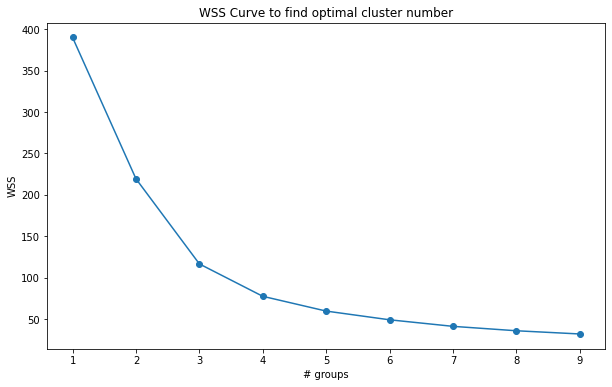

In [39]:
plt.figure(figsize=[10,6])
plt.title('WSS Curve to find optimal cluster number')
plt.xlabel('# groups')
plt.ylabel('WSS')
plt.plot(list(cluster_range),cluster_wss,marker='o')
plt.show()

As we can see in the graphic 4 clusters is a good option as after this the slope decreases in a very slow way meaning there is not much difference

# K-Means Model

So now we create our model with this parameter

In [40]:
model = KMeans(n_clusters=4,random_state=0)
model.fit(data_normalized)

KMeans(n_clusters=4, random_state=0)

In [41]:
# Dataframe with originals and clusters
df_total = df.copy()
df_total['cluster']=model.predict(data_normalized)
df_total[:5]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option,cluster
0,Mariupol,dim kavu,coffee store,4.6,206.0,unknown,False,False,0
1,Mariupol,коферум,cafe,5.0,24.0,False,False,True,3
2,Mariupol,кофейня світ чаю,coffee shop,5.0,11.0,unknown,False,True,3
3,Mariupol,кофейня starcoff,coffee shop,4.4,331.0,False,True,True,2
4,Mariupol,"кофейня ""friend zone""",coffee shop,5.0,12.0,unknown,True,True,3


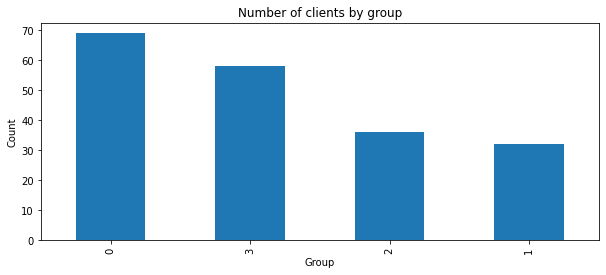

In [42]:
df_total.cluster.value_counts().plot(kind='bar', figsize=(10,4))
plt.title('Number of clients by group')
plt.xlabel('Group')
_ = plt.ylabel('Count')

In [43]:
df_total.cluster.value_counts()

0    69
3    58
2    36
1    32
Name: cluster, dtype: int64

In [44]:
group_descriptive = df_total[['Rating','Reviews','cluster']].groupby(['cluster']).mean()
group_descriptive

,Rating,Reviews
cluster,,
0,4.656917,397.028839
1,4.609375,1808.937500
2,4.400000,426.000000
3,4.913793,74.431034


We will now change this values into proportions to compare the clusters

In [45]:
rating_range = group_descriptive['Rating'].max() - group_descriptive['Rating'].min()
group_descriptive['rating_prop'] = (group_descriptive['Rating'] - group_descriptive['Rating'].min()) / rating_range
review_range = group_descriptive['Reviews'].max() - group_descriptive['Reviews'].min()
group_descriptive['review_prop'] = (group_descriptive['Reviews'] - group_descriptive['Reviews'].min()) / review_range
group_descriptive

,Rating,Reviews,rating_prop,review_prop
cluster,,,,
0,4.656917,397.028839,0.500040,0.185988
1,4.609375,1808.937500,0.407508,1.000000
2,4.400000,426.000000,0.000000,0.202691
3,4.913793,74.431034,1.000000,0.000000


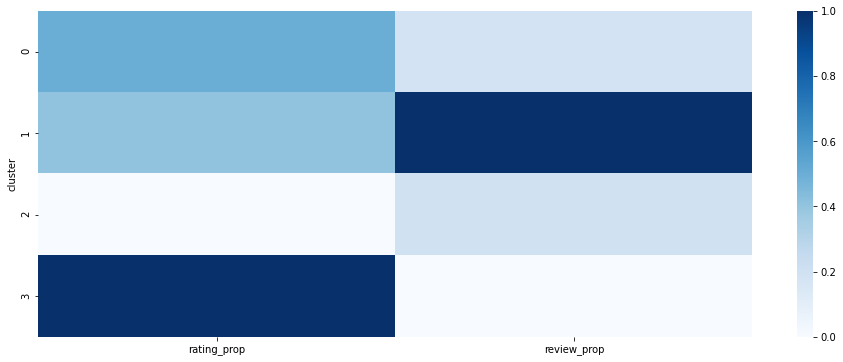

In [46]:
plt.subplots(figsize=(16, 6))
sns.heatmap(group_descriptive[['rating_prop', 'review_prop']],cmap='Blues')
plt.show()


We can see the different groups
 - Cluster 0 have  medium ratings and medium number of reviews
 - Cluster 1 also have medium rating but high number of reviews
 - Cluster 2 have low rating and me number of reviews
 - Cluster 3 have the highest rating but the less number of reviews

The most interesting cluster to analize will be cluster number 1 because it has a good rating and a high number of reviews

We from our graphic before we see that there are 32 shops in this cluster so we will now continue to analize them

In [47]:
cluster_1 = df_total.loc[df_total['cluster'] == 1]
display(cluster_1.head())
display(cluster_1.shape)

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option,cluster
20,Poltava,g coffee,coffee shop,4.5,1596.0,True,True,False,1
21,Poltava,kavun,coffee shop,4.7,1785.0,True,True,False,1
29,Poltava,dzhi,cafe,4.5,1195.0,True,True,True,1
34,Poltava,lviv handmade chocolate,chocolate shop,4.6,1376.0,False,True,True,1
42,Kherson,verona,european restaurant,4.5,1345.0,True,True,False,1


(32, 9)

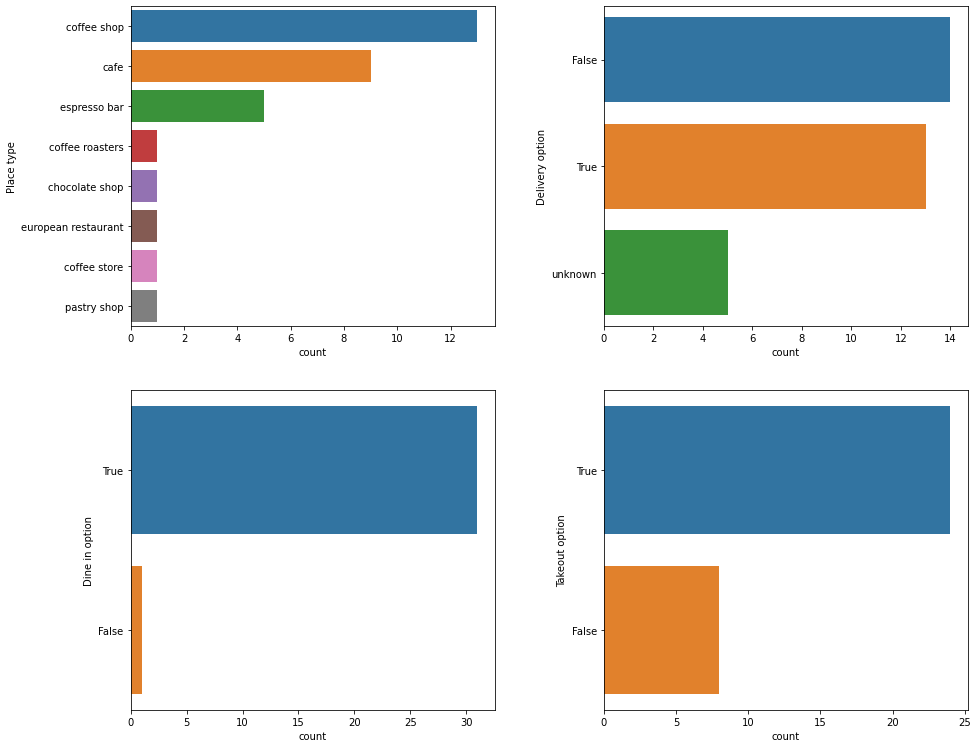

In [ ]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.2, wspace=0.3)
for i, categorical in enumerate(categorical_var):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=categorical, data=cluster_1, 
                  order=cluster_1[categorical].value_counts().index)
    
plt.show()

We see that this cluster has a very close structure to our data of all our shops.
 - The coffee shop is still the most frequent place type
 - The delivery option changes a little because here we have more True values than unknown which was not the case in the graphics of all our data
 - The Dine in option True value is still dominant 
 - finally the Takeout option True value still prevails also as dominant

We can also check which shops have all this values True

In [ ]:
all_true = cluster_1[(cluster_1['Delivery option'] == True) & (cluster_1['Dine in option'] == True) & (cluster_1['Takeout option'] == True)]
all_true.shape

(7, 9)

In [ ]:
prop_1 = len(all_true) / len(cluster_1)
print('Of the 32 Shops in cluster 1 {:.1%}.'.format(prop_1) ,' provides all 3 services')

Of the 32 Shops in cluster 1 21.9%.  provides all 3 services


In [ ]:
cluster_0 = df_total.loc[df_total['cluster'] == 0]
cluster_2 = df_total.loc[df_total['cluster'] == 2]
cluster_3 = df_total.loc[df_total['cluster'] == 3]
all_true_0 = cluster_0[(cluster_0['Delivery option'] == True) & (cluster_0['Dine in option'] == True) & (cluster_0['Takeout option'] == True)]
all_true_2 = cluster_2[(cluster_2['Delivery option'] == True) & (cluster_2['Dine in option'] == True) & (cluster_2['Takeout option'] == True)]
all_true_3 = cluster_3[(cluster_3['Delivery option'] == True) & (cluster_3['Dine in option'] == True) & (cluster_3['Takeout option'] == True)]
prop_0 = len(all_true_0) / len(cluster_0)
prop_2 = len(all_true_2) / len(cluster_2)
prop_3 = len(all_true_3) / len(cluster_3)
print('Of the 69 Shops in cluster 0 {:.1%}.'.format(prop_0) ,' provides all 3 services')
print('Of the 36 Shops in cluster 2 {:.1%}.'.format(prop_2) ,' provides all 3 services')
print('Of the 58 Shops in cluster 3 {:.1%}.'.format(prop_3) ,' provides all 3 services')

Of the 69 Shops in cluster 0 8.7%.  provides all 3 services
Of the 36 Shops in cluster 2 8.3%.  provides all 3 services
Of the 58 Shops in cluster 3 8.6%.  provides all 3 services


We see that our chosen cluster has the highest percentage of shops that provides the 3 services so it is something to keep in mind

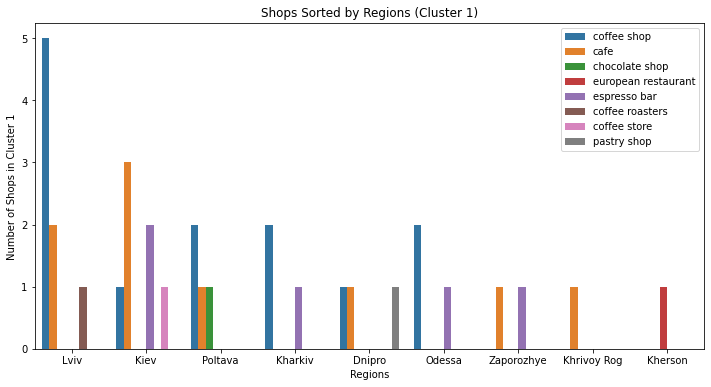

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=cluster_1['Region'],data=cluster_1,order=cluster_1['Region'].value_counts().index,hue = cluster_1['Place type'])
plt.title('Shops Sorted by Regions (Cluster 1)')
plt.xlabel('Regions')
plt.ylabel('Number of Shops in Cluster 1')
plt.legend(loc= 1)
plt.show()

We see that these most of the shops of this cluster are in the cities if Lviv and Kiev and the most predominant type places are 'coffee shop' and 'cafe'

# Conclusion

For this analysis we have used de Kmeans model using also the Elbow method to determine the best number of clusters which was 4

For it's characteristics we concluded that this 4 cluster have some characteristics

 - Cluster 0 have  medium ratings and medium number of reviews
 - Cluster 1 also have medium rating but high number of reviews
 - Cluster 2 have low rating and me number of reviews
 - Cluster 3 have the highest rating but the less number of reviews

We went a little deeper into cluster 1 and found that 21.9% of the shops in this cluster provides all 3 services ( Dine in, Takeout, Delivery)
Also that most of these shops are located in Lviv and Kiev

## Future Work

We encountered some problems with our data because of the missings
 - The first thing to do will be to try and complete the information 
 - It will also be a good idea to find more shops as there where only 200 entries

We could also did a little deeper in all of the clusters as we only focused on 1 

Finally we could also try some other clustering model as we only used K-means which works with numeric values